# Data exploration

In [40]:
# Import pandas
import pandas as pd
from urllib.request import urlretrieve

#url = 'https://data.cityofnewyork.us/resource/md7r-3zme.csv'
#real url above, datacamp edited url below
url = 'https://assets.datacamp.com/production/course_2023/datasets/dob_job_application_filings_subset.csv'

urlretrieve(url, 'dc_dob_jafs.csv')

# Read the file into a DataFrame: df
df = pd.read_csv('dc_dob_jafs.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

print(df.info())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
import pandas as pd
import requests

url = 'https://data.cityofnewyork.us/resource/md7r-3zme.json'
r = requests.get(url)

data = r.json()
df = pd.DataFrame(data)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
antenna                                1000 non-null object
applicant_first_name                   1000 non-null object
applicant_last_name                    1000 non-null object
applicant_license                      1000 non-null object
applicant_professional_title           1000 non-null object
apt_condo_no_s                         54 non-null object
bin                                    1000 non-null object
bin_2                                  975 non-null object
block                                  1000 non-null object
borough                                1000 non-null object
building_type                          1000 non-null object
built_1_information_value              1 non-null object
built_2_a_information_value            1 non-null object
built_2_b_information_value            1 non-null object
built_2_information_value              1 non-null object
census_tr

In [41]:
df_subset = df[['Job #','Doc #','Borough','Initial Cost','Total Est. Fee','Existing Zoning Sqft','Proposed Zoning Sqft','Enlargement SQ Footage','Street Frontage','ExistingNo. of Stories','Proposed No. of Stories','Existing Height','Proposed Height']]

#df_subset = df['Job #']
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


In [42]:
def remove_dollar(x):
    x = x[1:]
    x = float(x)
    return x
print(df_subset['Total Est. Fee'].head())
print(df_subset['Total Est. Fee'].apply(remove_dollar).head())
df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].apply(remove_dollar)
df_subset['Initial Cost'] = df_subset['Initial Cost'].apply(remove_dollar)

0     $986.00
1    $1144.00
2     $522.50
3     $225.00
4     $389.50
Name: Total Est. Fee, dtype: object
0     986.0
1    1144.0
2     522.5
3     225.0
4     389.5
Name: Total Est. Fee, dtype: float64


/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df_subset.describe()

,Job #,Doc #,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,2.426788e+08,1.162930,1.803139e+05,2.894909e+03,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,1.312507e+08,0.514937,7.961524e+06,1.213534e+05,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216206e+08,1.000000,0.000000e+00,2.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,2.202645e+08,1.000000,1.597500e+04,4.195000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,3.208652e+08,1.000000,6.790500e+04,9.297000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,5.400246e+08,9.000000,9.003000e+08,1.014000e+07,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


In [44]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64


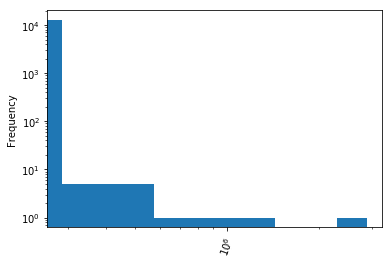

In [45]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df_subset['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)


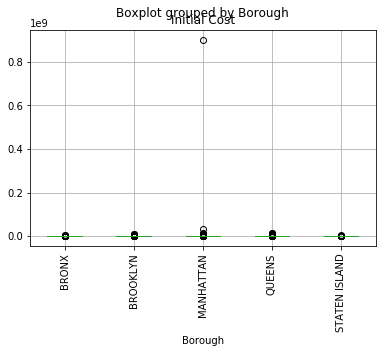

In [46]:
df_subset.boxplot(column='Initial Cost', by='Borough', rot=90)

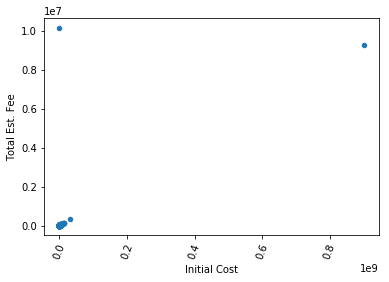

In [47]:
df_subset.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)

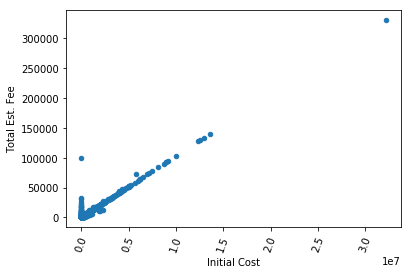

In [48]:
df_no_outliers = df_subset[df_subset['Total Est. Fee']<2000000]
df_no_outliers.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)

# Tidy data

In [35]:
url = 'https://assets.datacamp.com/production/course_2023/datasets/airquality.csv'
urlretrieve(url, 'dc_airquality.csv')
airquality = pd.read_csv('dc_airquality.csv')

In [51]:
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


In [52]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = pd.pivot_table(airquality_melt, index=['Month', 'Day'], columns='measurement', values='reading')

print(airquality_pivot.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [53]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

print(airquality_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [54]:
url = 'https://assets.datacamp.com/production/course_2023/datasets/tb.csv'
urlretrieve(url, 'dc_tuberculosis.csv')
tb = pd.read_csv('dc_tuberculosis.csv')

# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


In [94]:
url = 'https://assets.datacamp.com/production/course_2023/datasets/ebola.csv'
urlretrieve(url, 'dc_ebola.csv')
ebola = pd.read_csv('dc_ebola.csv')

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt['str_split'].str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt['str_split'].str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


In [61]:
url = 'https://assets.datacamp.com/production/course_2023/datasets/nyc_uber_2014.csv'
urlretrieve(url, 'dc_uber.csv')
uber = pd.read_csv('dc_uber.csv')
uber1 = uber[uber['Date/Time'].str.contains('4/1/2014')]
uber2 = uber[uber['Date/Time'].str.contains('5/1/2014')]
uber3 = uber[uber['Date/Time'].str.contains('6/1/2014')]
uber1.to_csv('dc_uber_1.csv')
uber2.to_csv('dc_uber_2.csv')
uber3.to_csv('dc_uber_3.csv')

In [59]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1,uber2,uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

(297, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


In [62]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = 'dc_uber_*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

['dc_uber_1.csv', 'dc_uber_2.csv', 'dc_uber_3.csv']
   Unnamed: 0  Unnamed: 0.1         Date/Time      Lat      Lon    Base
0          99             0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1         100             1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2         101             2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3         102             3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4         103             4  5/1/2014 0:17:00  40.7594 -73.9734  B02512


In [63]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

(297, 6)
   Unnamed: 0  Unnamed: 0.1         Date/Time      Lat      Lon    Base
0           0             0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1             1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2             2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3             3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4             4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


# Data types
## Convert

In [64]:
url = 'https://assets.datacamp.com/production/course_2023/datasets/tips.csv'
urlretrieve(url, 'dc_tips.csv')
tips = pd.read_csv('dc_tips.csv')

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


In [65]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


## Reg-ex

In [66]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

True
False


In [67]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


In [68]:
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True
True


## Functions

In [69]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2          0
1       10.34  1.66    Male     No  Sun  Dinner     3          1
2       21.01  3.50    Male     No  Sun  Dinner     3          1
3       23.68  3.31    Male     No  Sun  Dinner     2          1
4       24.59  3.61  Female     No  Sun  Dinner     4          0


In [84]:
tips['total_dollar'] = '$'+tips['total_bill'].astype(str)

# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size sex_recode total_dollar  \
0       16.99  1.01  Female     No  Sun  Dinner     2          0       $16.99   
1       10.34  1.66    Male     No  Sun  Dinner     3          1       $10.34   
2       21.01  3.50    Male     No  Sun  Dinner     3          1       $21.01   
3       23.68  3.31    Male     No  Sun  Dinner     2          1       $23.68   
4       24.59  3.61  Female     No  Sun  Dinner     4          0       $24.59   

  total_dollar_replace total_dollar_re  
0                16.99           16.99  
1                10.34           10.34  
2                21.01           21.01  
3                23.68           23.68  
4                24.59           24.59  


# Missing data

In [85]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


# Asserts

In [95]:
# Assert that there are no missing values
assert ebola.notnull().all().all()

AssertionError: 

In [96]:
ebola = ebola.fillna(0)
print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            0.0            10030.0   
1    1/4/2015  288        2775.0            0.0             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           0.0         8157.0                0.0   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            0.0            0.0                 0.0          0.0         0.0   
1            0.0            0.0                 0.0          0.0         0.0   
2            0.0            0.0                 0.0          0.0         0.0   
3            0.0            0.0                 0.0          0.0         0.0   
4            0.0            0.0                 0.0          0.0         0.0   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [97]:
# Assert that there are no missing values
assert ebola.notnull().all().all()

# Assert that all values are >= 0
assert (ebola>=0).all().all()

# Example: Gapminder data

In [128]:
url = 'https://assets.datacamp.com/production/course_2023/datasets/gapminder.csv'
urlretrieve(url, 'dc_gapminder.csv')
gapminder_raw = pd.read_csv('dc_gapminder.csv')

g1800s = gapminder_raw.loc[:259,'1800':'1899']
g1800s.insert(loc=0,column='Life expectancy',value=gapminder_raw['Life expectancy'])
print(g1800s)
print(g1800s.info())

              Life expectancy   1800   1801   1802   1803   1804   1805  \
0                    Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN   
1                 Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16   
2       Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN   
3                     Albania  35.40  35.40  35.40  35.40  35.40  35.40   
4                     Algeria  28.82  28.82  28.82  28.82  28.82  28.82   
5              American Samoa    NaN    NaN    NaN    NaN    NaN    NaN   
6                     Andorra    NaN    NaN    NaN    NaN    NaN    NaN   
7                      Angola  26.98  26.98  26.98  26.98  26.98  26.98   
8                    Anguilla    NaN    NaN    NaN    NaN    NaN    NaN   
9         Antigua and Barbuda  33.54  33.54  33.54  33.54  33.54  33.54   
10                  Argentina  33.20  33.20  33.20  33.20  33.20  33.20   
11                    Armenia  34.00  34.00  34.00  34.00  34.00  34.00   
12                      A

(20, 55)

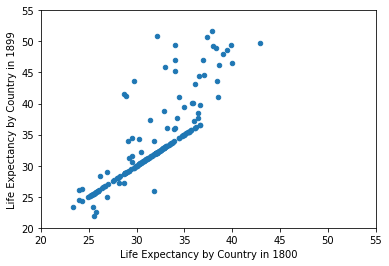

In [129]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

In [130]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [131]:
g1900s = gapminder_raw.loc[260:519,'1900':'1999']
g1900s.insert(loc=0,column='Life expectancy',value=gapminder_raw['Life expectancy'])
g2000s = gapminder_raw.loc[520:,'2000':'2016']
g2000s.insert(loc=0,column='Life expectancy',value=gapminder_raw['Life expectancy'])

In [132]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s,g1900s,g2000s])

print(gapminder.shape)

print(gapminder.head())

(780, 218)
    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN        

In [133]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder,id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country','year','life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [135]:
import numpy as np
gapminder = gapminder_melt
print(gapminder.info())
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB
None


In [136]:
# Create the series of countries: countries
countries = pd.Series(gapminder.country)

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


In [137]:
print(gapminder.shape)

# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna()

print(gapminder.shape)

(169260, 3)
(43857, 3)


year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


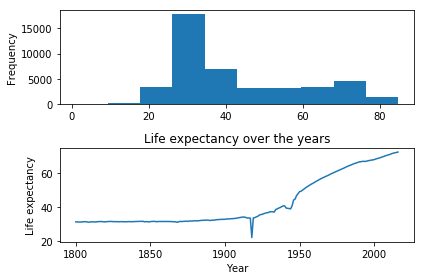

In [138]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder_clean.csv')
gapminder_agg.to_csv('gapminder_clean_mean.csv')